<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/treino_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
kaggle=pd.read_csv("/Users/chenyenpin/Downloads/Linear Regression.csv", sep=",")
kaggle

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [ ]:
kaggle.isna().sum()

X    0
Y    0
dtype: int64

<AxesSubplot:xlabel='X', ylabel='Y'>

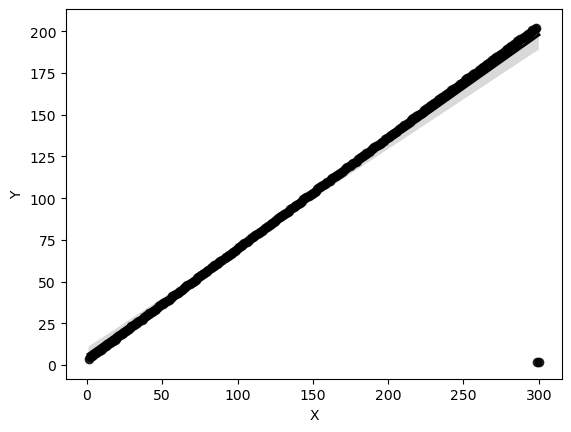

In [ ]:
sns.regplot(data=kaggle,x=kaggle["X"],y=kaggle["Y"], x_jitter=0.5,  fit_reg=True,color="black" )

In [ ]:
kaggle.corr()

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


In [ ]:
y=kaggle["Y"]
x=sm.add_constant(kaggle["X"])

In [ ]:
regressor_result=sm.OLS(y,x).fit()

In [ ]:
print(regressor_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 31 May 2023   Prob (F-statistic):          1.35e-166
Time:                        21:20:12   Log-Likelihood:                -1261.1
No. Observations:                 300   AIC:                             2526.
Df Residuals:                     298   BIC:                             2534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8888      1.881      3.131      0.0

In [ ]:
kaggle["Y_Preview"]=regressor_result.predict()
kaggle

,X,Y,Y_Preview
0,1,3.888889,6.528845
1,2,4.555556,7.168889
2,3,5.222222,7.808934
3,4,5.888889,8.448979
4,5,6.555556,9.089024
...,...,...,...
295,296,200.555556,195.342087
296,297,201.222222,195.982132
297,298,201.888889,196.622177
298,299,1.888889,197.262222


In [ ]:
kaggle["Residuo"]=kaggle["Y"]- kaggle["Y_Preview"]
kaggle

,X,Y,Y_Preview,Residuo
0,1,3.888889,6.528845,-2.639956
1,2,4.555556,7.168889,-2.613334
2,3,5.222222,7.808934,-2.586712
3,4,5.888889,8.448979,-2.560090
4,5,6.555556,9.089024,-2.533469
...,...,...,...,...
295,296,200.555556,195.342087,5.213469
296,297,201.222222,195.982132,5.240090
297,298,201.888889,196.622177,5.266712
298,299,1.888889,197.262222,-195.373333


In [ ]:
salary=pd.read_csv("/Users/chenyenpin/Downloads/Salary_dataset.csv")
salary1=salary.drop("Unnamed: 0", axis=1)
salary1


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
salary1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
salary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='Salary', ylabel='Count'>

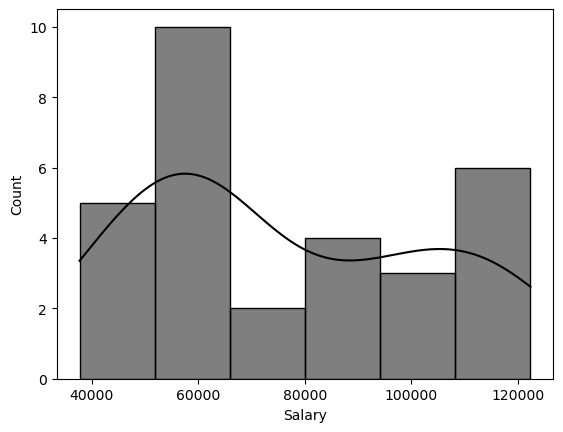

In [ ]:
sns.histplot(data=salary1["Salary"], kde=True, color="black")

<AxesSubplot:>

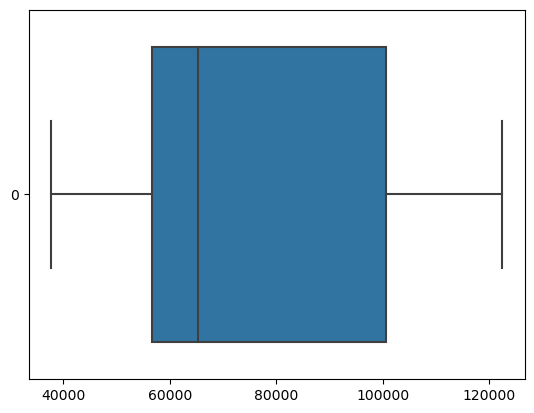

In [ ]:
sns.boxplot(data=salary1["Salary"], orient='h')

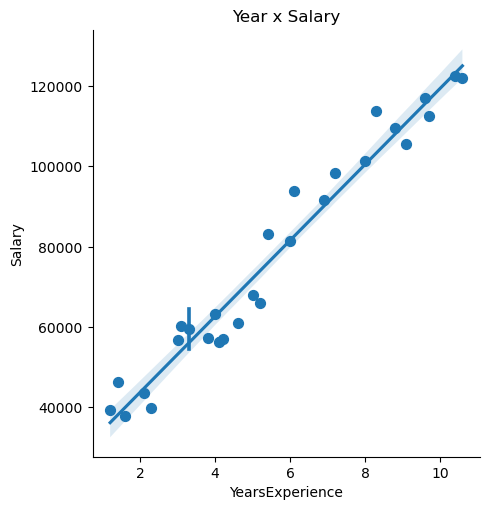

In [ ]:
sns.lmplot(data=salary1, x="YearsExperience", y="Salary", x_estimator=np.mean).set(title="Year x Salary")

In [ ]:
salary2=salary1

In [ ]:
salary1.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
y=salary1["YearsExperience"]
x=sm.add_constant(salary1["Salary"])

In [ ]:
regressor=sm.OLS(y,x).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.14e-20
Time:                        21:20:19   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2833      0.327     -6.976      0.0

In [ ]:
salary1["Preview"]=regressor.predict()
salary1

,YearsExperience,Salary,Preview
0,1.2,39344.0,1.700934
1,1.4,46206.0,2.395819
2,1.6,37732.0,1.537694
3,2.1,43526.0,2.124427
4,2.3,39892.0,1.756428
5,3.0,56643.0,3.452729
6,3.1,60151.0,3.807969
7,3.3,54446.0,3.230248
8,3.3,64446.0,4.242905
9,3.8,57190.0,3.508121


In [ ]:
salary1["Error"]=salary1["Salary"]-salary1["Preview"]
salary1

,YearsExperience,Salary,Preview,Error
0,1.2,39344.0,1.700934,39342.299066
1,1.4,46206.0,2.395819,46203.604181
2,1.6,37732.0,1.537694,37730.462306
3,2.1,43526.0,2.124427,43523.875573
4,2.3,39892.0,1.756428,39890.243572
5,3.0,56643.0,3.452729,56639.547271
6,3.1,60151.0,3.807969,60147.192031
7,3.3,54446.0,3.230248,54442.769752
8,3.3,64446.0,4.242905,64441.757095
9,3.8,57190.0,3.508121,57186.491879


In [ ]:
x=salary2["Salary"]
y=salary2["YearsExperience"]

In [ ]:
np.random.seed(42)
randon=np.random.permutation(len(salary2))
x=x.iloc[randon]
y=y.iloc[randon]


In [ ]:
print(x,y)

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64 27     9.7
15     5.0
23     8.3
17     5.4
8      3.3
9      3.8
28    10.4
24     8.8
12     4.1
0      1.2
4      2.3
16     5.2
5      3.0
13     4.2
11     4.1
22     8.0
1      1.4
2      1.6
25     9.1
3      2.1
21     7.2
26     9.6
18     6.0
29    10.6
20     6.9
7      3.3
10     4.0
14     4.6
19     6.1
6      3.1
Name: YearsExperience, dtype: float64


In [ ]:
x=sm.add_constant(x)


In [ ]:
regressor1=sm.OLS(y,x).fit()
print(regressor1.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.14e-20
Time:                        21:20:20   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2833      0.327     -6.976      0.0

In [ ]:
credito=pd.read_excel("/Users/chenyenpin/Downloads/2_15/Limite_Credito.xlsx")
credito.shape

(48, 6)

In [ ]:
credito

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio
5,35,5000,5000,1000,1000,Fundamental_Medio
6,80,8100,8100,3500,1000,Fundamental_Medio
7,66,4800,4800,440,1500,Fundamental_Medio
8,39,6320,6320,1550,1640,Fundamental_Medio
9,47,5000,5000,2000,1700,Fundamental_Medio


In [ ]:
credito=pd.get_dummies(credito,prefix=["Escalaridade"])
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escalaridade_Fundamental_Medio,Escalaridade_Superior_Pos
0,70,10736,5214,400,500,1,0
1,68,5000,5000,380,600,1,0
2,44,5800,5800,500,800,1,0
3,72,4300,4300,2000,1000,1,0
4,75,4400,4400,3000,1000,1,0


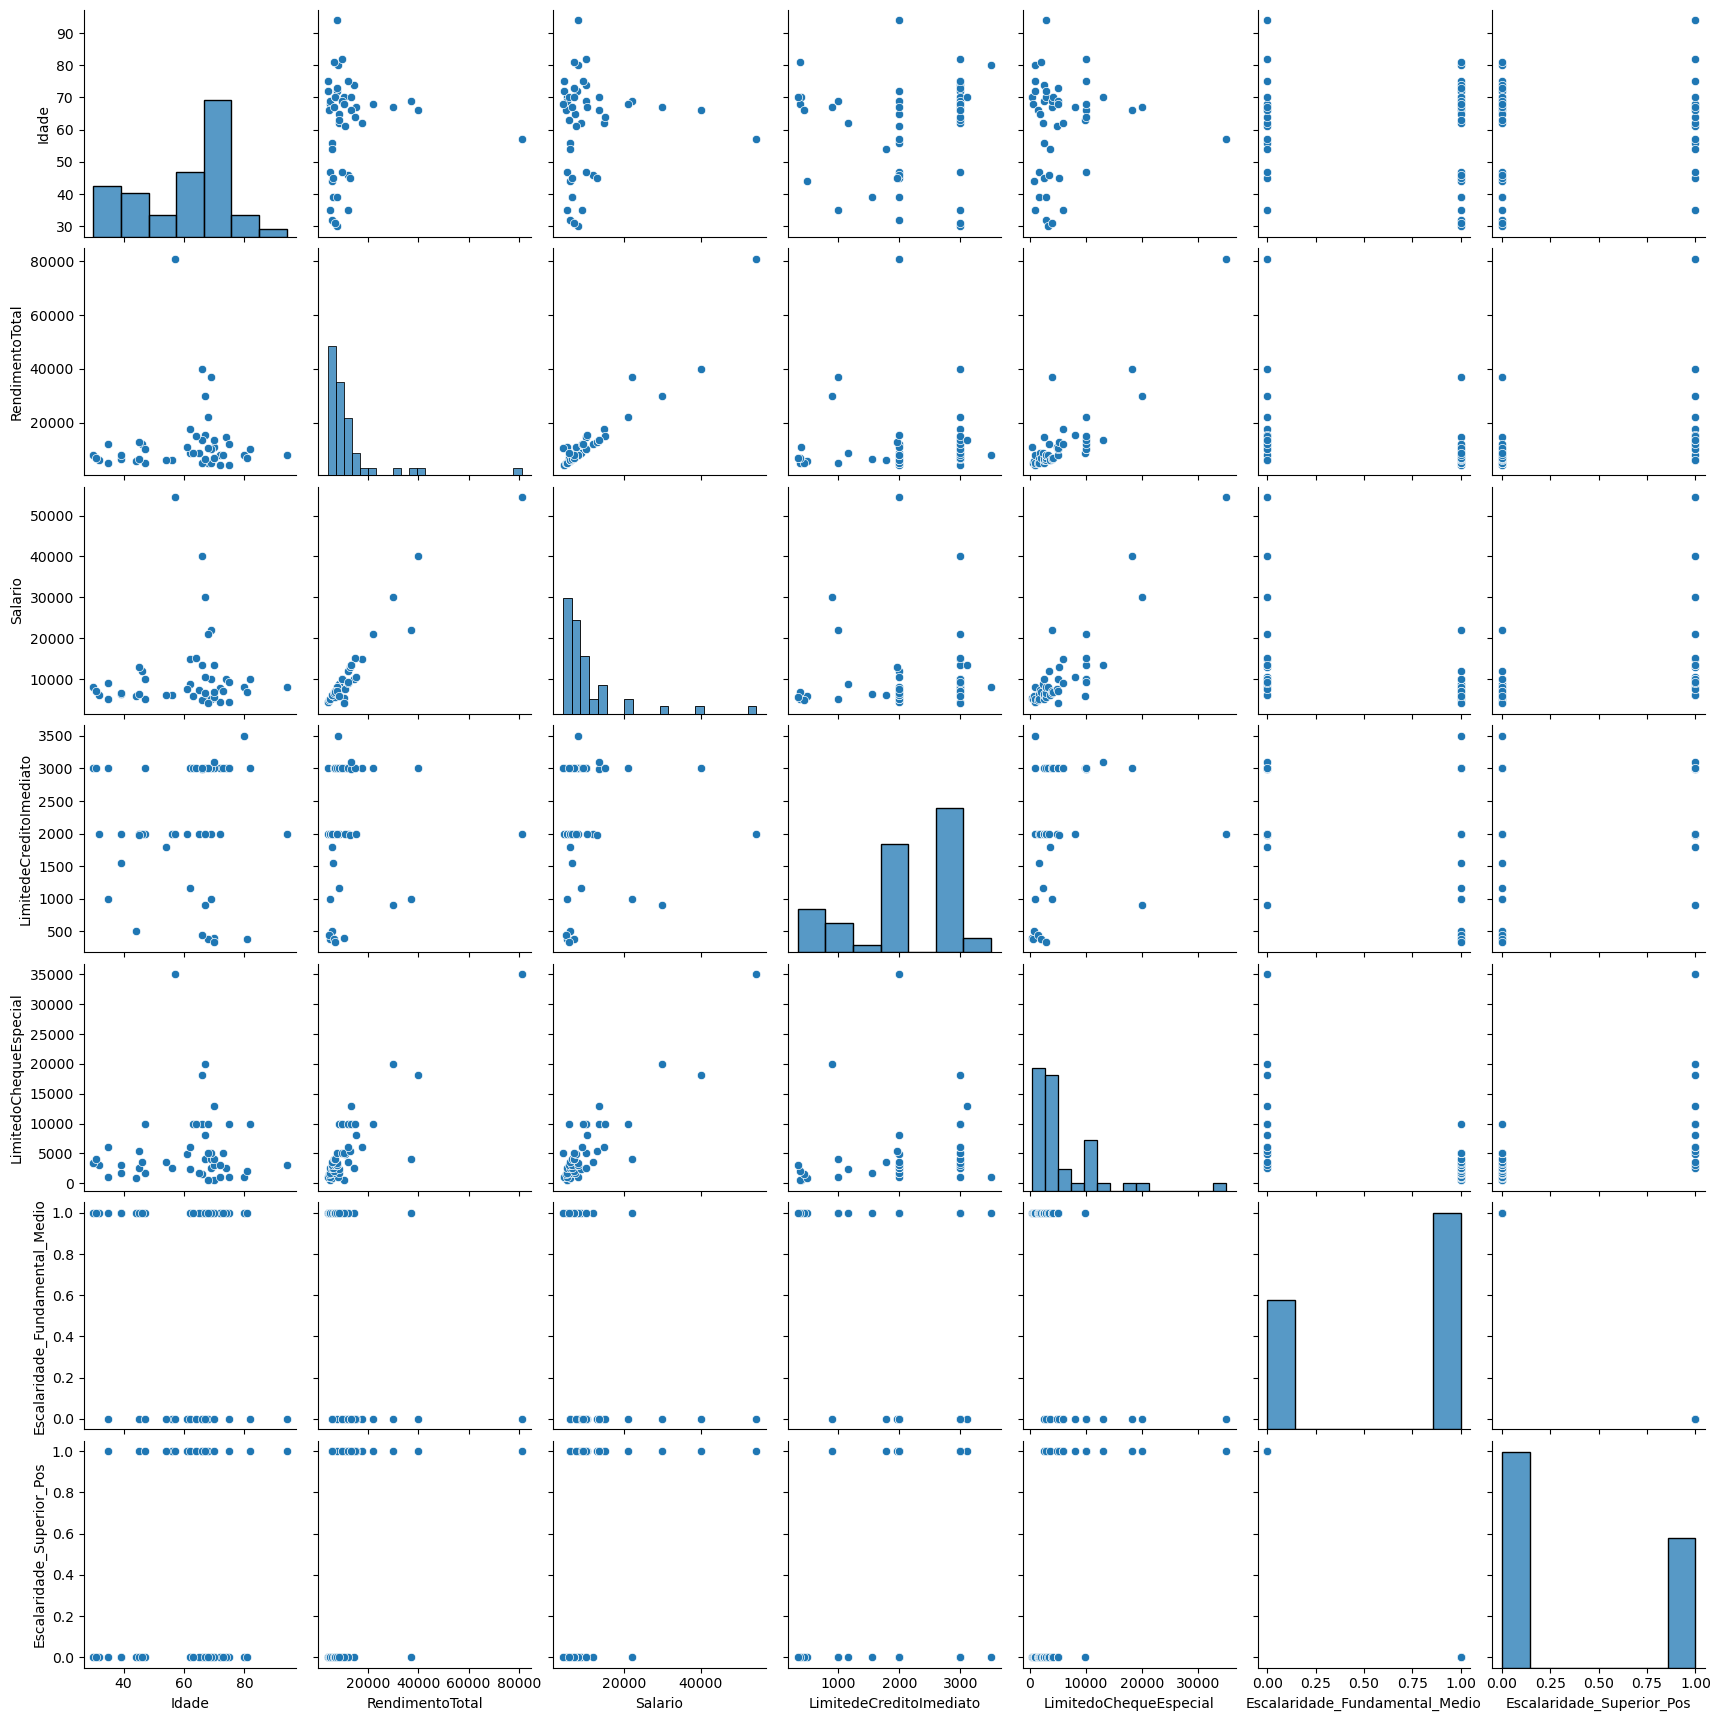

In [ ]:
sns.pairplot(credito)

In [ ]:
credito.corr().T

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escalaridade_Fundamental_Medio,Escalaridade_Superior_Pos
Idade,1.000000,0.066396,0.063227,0.064149,0.075883,-0.110892,0.110892
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191
Salario,0.063227,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310
Escalaridade_Fundamental_Medio,-0.110892,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000
Escalaridade_Superior_Pos,0.110892,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000


In [ ]:
function="LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escalaridade_Fundamental_Medio+Escalaridade_Superior_Pos"
model=smf.ols(formula=function, data=credito).fit()
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                     46.89
Date:                    Wed, 31 May 2023   Prob (F-statistic):           4.07e-16
Time:                            21:20:33   Log-Likelihood:                -441.00
No. Observations:                      48   AIC:                             894.0
Df Residuals:                          42   BIC:                             905.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escalaridade_Fundamental_Medio+Escalaridade_Superior_Pos -1"
model=smf.ols(formula=function, data=credito).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Wed, 31 May 2023   Prob (F-statistic):           4.92e-17
Time:                            21:20:33   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escalaridade_Fundamental_Medio+Escalaridade_Superior_Pos -1"
model=smf.ols(formula=function, data=credito).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Wed, 31 May 2023   Prob (F-statistic):           4.92e-17
Time:                            21:20:33   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escalaridade_Fundamental_Medio+Escalaridade_Superior_Pos -1"
model=smf.ols(formula=function, data=credito).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.842
Model:                                OLS   Adj. R-squared:                  0.831
Method:                     Least Squares   F-statistic:                     77.92
Date:                    Wed, 31 May 2023   Prob (F-statistic):           1.23e-17
Time:                            21:20:33   Log-Likelihood:                -442.00
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          44   BIC:                             899.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function="LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escalaridade_Fundamental_Medio -1"
model=smf.ols(formula=function, data=credito).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.915
Model:                                OLS   Adj. R-squared (uncentered):              0.909
Method:                     Least Squares   F-statistic:                              160.9
Date:                    Wed, 31 May 2023   Prob (F-statistic):                    4.57e-24
Time:                            21:20:33   Log-Likelihood:                         -442.01
No. Observations:                      48   AIC:                                      890.0
Df Residuals:                          45   BIC:                                      895.6
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                                     coef    std err          t      P>|t|      

In [ ]:
dummy=pd.read_excel("/Users/chenyenpin/Downloads/Limite_Credito_Dummy.xlsx")
dummy=pd.get_dummies(dummy, prefix=["Escolaridade", "Regiao","Genero"])
dummy.head()


,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Regiao_RJ,Regiao_SP,Genero_F,Genero_M
0,70,10736,5214,400,500,1,0,1,0,1,0
1,68,5000,5000,380,600,1,0,1,0,1,0
2,44,5800,5800,500,800,1,0,1,0,1,0
3,72,4300,4300,2000,1000,1,0,1,0,1,0
4,75,4400,4400,3000,1000,1,0,1,0,1,0


In [ ]:
sns.pairplot(dummy)

<AxesSubplot:>

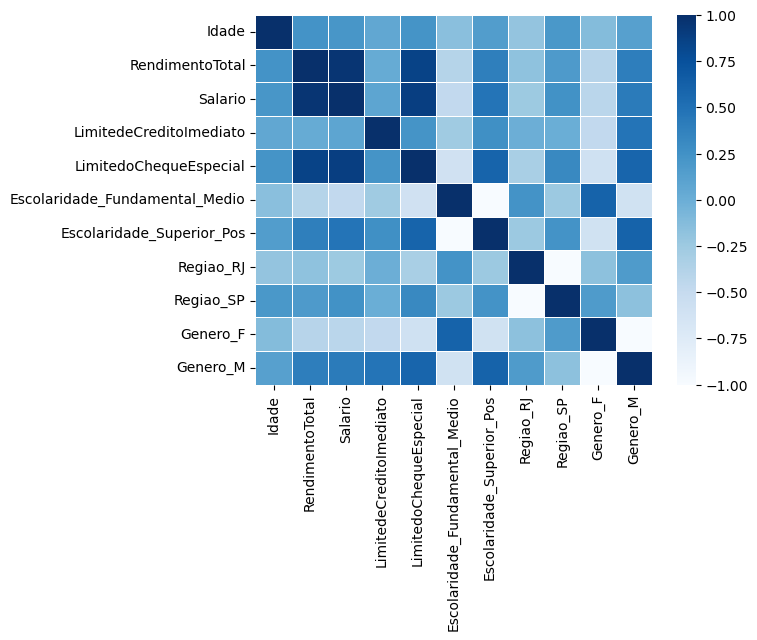

In [ ]:
corr=dummy.corr()
sns.heatmap(corr,cmap="Blues" , linewidths=.5)

In [ ]:
corr

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Regiao_RJ,Regiao_SP,Genero_F,Genero_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Regiao_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Regiao_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Genero_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


In [ ]:
function1="LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP	+Genero_F+Genero_M	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Wed, 31 May 2023   Prob (F-statistic):           7.44e-17
Time:                            01:04:50   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function1="LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP	+Genero_F+Genero_M	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Wed, 31 May 2023   Prob (F-statistic):           9.97e-18
Time:                            01:05:49   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function1="LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP	+Genero_F+Genero_M	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.868
Method:                     Least Squares   F-statistic:                     52.34
Date:                    Wed, 31 May 2023   Prob (F-statistic):           1.16e-17
Time:                            01:07:00   Log-Likelihood:                -434.42
No. Observations:                      48   AIC:                             882.8
Df Residuals:                          41   BIC:                             895.9
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function1="LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP	+Genero_F+Genero_M	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Wed, 31 May 2023   Prob (F-statistic):           1.39e-18
Time:                            01:07:25   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function1="LimitedoChequeEspecial~Salario+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP	+Genero_F+Genero_M	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.880
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     78.87
Date:                    Wed, 31 May 2023   Prob (F-statistic):           3.15e-19
Time:                            01:08:06   Log-Likelihood:                -435.33
No. Observations:                      48   AIC:                             880.7
Df Residuals:                          43   BIC:                             890.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
function1="LimitedoChequeEspecial~Salario+Regiao_RJ+Regiao_SP+Genero_F+Genero_M -1	"
model1=smf.ols(formula=function1,data=dummy).fit()
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Wed, 31 May 2023   Prob (F-statistic):           3.24e-20
Time:                            01:09:14   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     